In [40]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

In [41]:
np.random.seed(0)

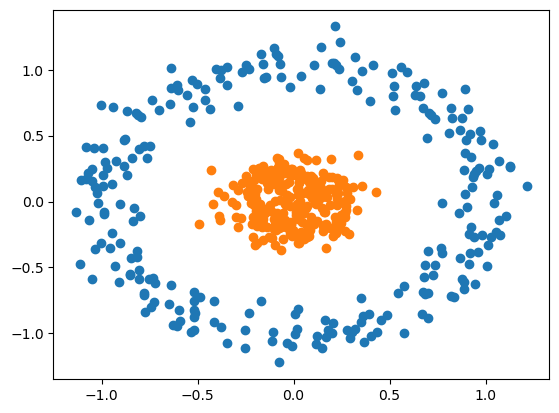

In [42]:
n_pts = 500
X, Y = datasets.make_circles(n_samples= n_pts, random_state= 123, noise= 0.1, factor= 0.2)

plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])

In [43]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [44]:
model = Sequential()

#### Add input and first hidden layer of our NN

In [45]:
model.add(Dense(4, input_shape= (2,), activation= 'sigmoid'))  #  Hidden layer nodes: 4, Input layer nodes: 2, Acivation function: Sigmoid
model.add(Dense(1, activation= 'sigmoid'))  #  Output layer nodes: 1, activation function: Sigmoid
model.compile(Adam(learning_rate= 0.01), 'binary_crossentropy', metrics= ['accuracy'])  #  Compile the model

c:\Users\saadG\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Train the model

In [46]:
h = model.fit(x= X, y= Y, verbose= 1, batch_size= 20, epochs= 100, shuffle= 'true')

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3345 - loss: 0.7037
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5181 - loss: 0.6942 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5431 - loss: 0.6937 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5908 - loss: 0.6950 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4258 - loss: 0.6932 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5496 - loss: 0.6931 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6241 - loss: 0.6935 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6682 - loss: 0.6899 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3990 - loss: 0.6900 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6105 - loss: 0.6927 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6537 - loss: 0.6888 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

#### Plotting final accuracy and loss

Text(0.5, 1.0, 'accuracy')

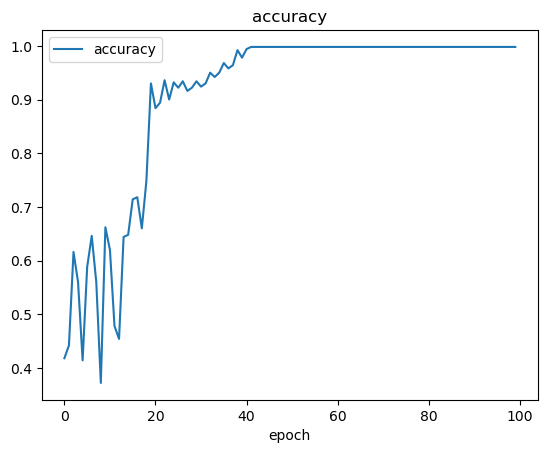

In [47]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

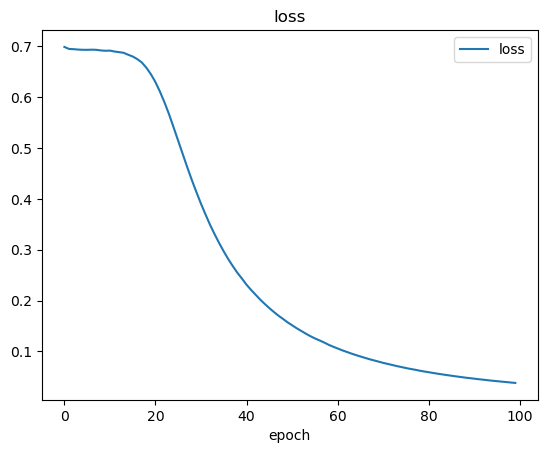

In [48]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

#### Plot final scatterplot

In [52]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction is:  [[0.0382248]]


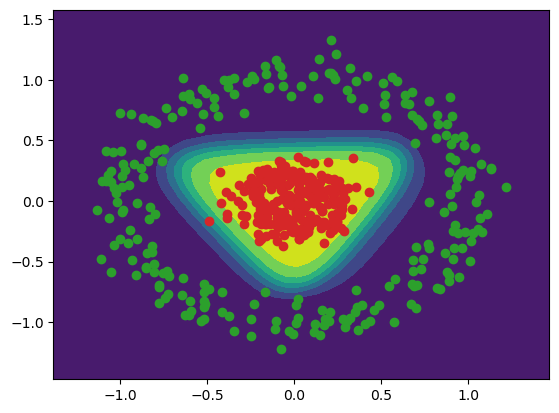

In [54]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])
plot_decision_boundary(X, Y, model)
plt.scatter(X[Y==0, 0], X[Y==0, 1])
plt.scatter(X[Y==1, 0], X[Y==1, 1])
 
x = 0
y = 0.75
 
point = np.array([[x, y]])
predict = model.predict(point)
print("Prediction is: ", predict)